In [ ]:
from google.colab import drive
import os
import cv2
import numpy as np
from imgaug import augmenters as iaa
from tqdm import tqdm
import shutil

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Set paths
input_folder = "/content/drive/MyDrive/Original Images"  # Replace with actual path
output_folder = "/content/drive/MyDrive/Augmented Images"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Define augmentations
augmentation_pipeline = iaa.Sequential([
    iaa.Fliplr(0.5),  # Horizontal flip with 50% probability
    iaa.Flipud(0.2),  # Vertical flip with 20% probability
    iaa.Affine(rotate=(-15, 15)),  # Rotate images by -15 to 15 degrees
    iaa.Affine(scale=(0.8, 1.2)),  # Zoom in and out by 20%
    iaa.Multiply((0.8, 1.2)),  # Adjust brightness
    iaa.LinearContrast((0.75, 1.5)),  # Adjust contrast
    iaa.AdditiveGaussianNoise(scale=(0, 0.05*255)),  # Add Gaussian noise
    iaa.GaussianBlur(sigma=(0, 1.0))  # Apply Gaussian blur
])

# Specify the number of augmentations per image
num_augmentations = 5  # Change this to the desired number of augmentations

# Traverse through all subdirectories and augment images
for root, _, files in os.walk(input_folder):
    for image_name in tqdm(files):
        # Skip non-image files
        if not image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            continue

        image_path = os.path.join(root, image_name)
        image = cv2.imread(image_path)

        if image is not None:
            # Construct the corresponding output folder path
            relative_path = os.path.relpath(root, input_folder)
            output_subfolder = os.path.join(output_folder, relative_path)
            if not os.path.exists(output_subfolder):
                os.makedirs(output_subfolder)

            # Generate multiple augmented images
            for i in range(num_augmentations):
                augmented_image = augmentation_pipeline(image=image)
                output_path = os.path.join(output_subfolder, f"{os.path.splitext(image_name)[0]}_aug_{i}.jpg")
                cv2.imwrite(output_path, augmented_image)

Mounted at /content/drive


100%|██████████| 1/1 [00:00<00:00, 7269.16it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 15/15 [00:06<00:00,  2.35it/s]
0it [00:00, ?it/s]
100%|██████████| 114/114 [00:26<00:00,  4.37it/s]
0it [00:00, ?it/s]
100%|██████████| 6/6 [00:01<00:00,  3.14it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 83/83 [00:26<00:00,  3.19it/s]
0it [00:00, ?it/s]
100%|██████████| 21/21 [00:06<00:00,  3.31it/s]
0it [00:00, ?it/s]
100%|██████████| 9/9 [00:02<00:00,  3.04it/s]
0it [00:00, ?it/s]
100%|██████████| 22/22 [00:07<00:00,  3.05it/s]
0it [00:00, ?it/s]
100%|██████████| 1/1 [00:00<00:00, 8924.05it/s]
0it [00:00, ?it/s]
100%|██████████| 11/11 [00:03<00:00,  3.27it/s]
0it [00:00, ?it/s]
100%|██████████| 80/80 [00:25<00:00,  3.10it/s]
0it [00:00, ?it/s]
100%|██████████| 10/10 [00:04<00:00,  2.27it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 15/15 [00:05<00:00,  2.73it/s]
0it [00:00, ?it/s]
100%|██████████| 11/11 [00:03<00:00,  3.05it/s]
0it [00:00, ?it/s]
100%|██

In [ ]:
# Set paths
input_folder = "/content/drive/MyDrive/Original Images"  # Replace with actual path
output_folder = "/content/drive/MyDrive/Augmented Images"
merged_folder = "/content/drive/MyDrive/Augmented Final"

# Create merged_folder if it doesn't exist
if not os.path.exists(merged_folder):
    os.makedirs(merged_folder)

# Function to recursively copy images from source_folder to target_folder, preserving the directory structure
def copy_images(source_folder, target_folder):
    for root, dirs, files in os.walk(source_folder):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                # Construct the full path to the source file
                source_file_path = os.path.join(root, file)

                # Determine the relative path and target file path in the merged directory
                relative_path = os.path.relpath(root, source_folder)
                target_subfolder = os.path.join(target_folder, relative_path)

                # Create the target subfolder if it doesn't exist
                if not os.path.exists(target_subfolder):
                    os.makedirs(target_subfolder)

                # Copy the image file to the merged folder, preserving folder structure
                target_file_path = os.path.join(target_subfolder, file)
                shutil.copy2(source_file_path, target_file_path)

# Copy images from both input_folder and output_folder into merged_folder
copy_images(input_folder, merged_folder)
copy_images(output_folder, merged_folder)

print("Merging complete. All images from both folders are now in the merged folder with the same structure.")

Merging complete. All images from both folders are now in the merged folder with the same structure.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


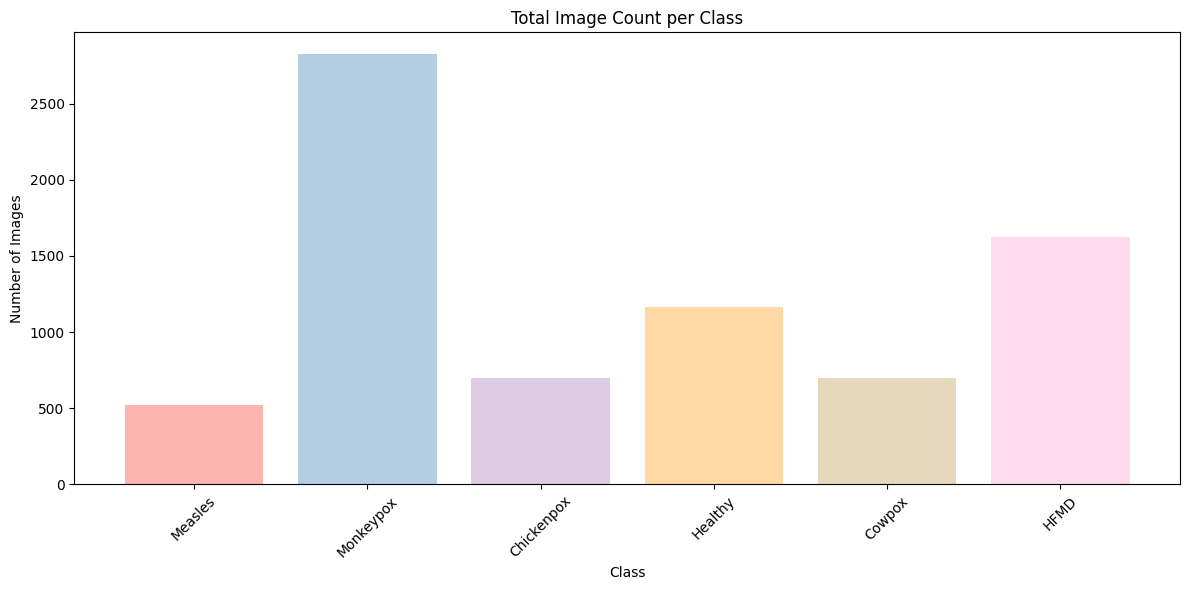

In [10]:
import os
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# Mount Google Drive
drive.mount('/content/drive')

# Path to the dataset
dataset_path = "/content/drive/MyDrive/Augmented Data"

# Initialize a dictionary to store total counts for each class
class_counts_total = {}

# Recursive function to process folders and count images
def count_images_in_class_folders(path):
    for entry in os.listdir(path):
        entry_path = os.path.join(path, entry)
        if os.path.isdir(entry_path):
            # If it's a directory, recurse into it
            count_images_in_class_folders(entry_path)
        else:
            # If it's a file, count it for the class
            class_name = os.path.basename(path)  # Folder name is the class name
            if class_name in class_counts_total:
                class_counts_total[class_name] += 1
            else:
                class_counts_total[class_name] = 1

# Start the recursive image counting
count_images_in_class_folders(dataset_path)

# Prepare data for plotting
classes = list(class_counts_total.keys())
counts = list(class_counts_total.values())

# Use a pastel colormap
cmap = plt.get_cmap("Pastel1")  # Pastel colormap
colors = [cmap(i / len(classes)) for i in range(len(classes))]  # Evenly sample pastel colors

# Plot the total image count per class with pastel colors
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(classes, counts, color=colors)

# Add labels and title
plt.title("Total Image Count per Class")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()